# Importing the packages

In [24]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Input
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K

# Data Cleaning

In [25]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
# input_size=(28,28,1)

In [26]:
# One-hot encodes the labels using keras.utils.to_categorical()
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [27]:
# Coverting to float for Independent Variable
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [28]:
# Normalizes pixel values (0–255 → 0–1)
X_train=X_train/255
X_test=X_test/255

# Data modeling

In [29]:
model=Sequential()
model.add(Input(shape=(X_train.shape[1:]))) 
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               6

2025-06-29 16:15:31.155832: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-29 16:15:31.319042: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-29 16:15:31.321253: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [30]:
# Early stopping
import tensorflow as tf
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
)

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='Adadelta',metrics=['accuracy'])
hist=model.fit(X_train,y_train,batch_size=128,epochs=200,verbose=1,validation_split=0.3)

Epoch 1/200


2025-06-29 16:15:32.181269: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2025-06-29 16:15:32.994183: I external/local_xla/xla/service/service.cc:168] XLA service 0x74d7c4e387d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-06-29 16:15:32.994209: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-06-29 16:15:33.006166: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1751193933.062277    6675 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


329/329 [==============================] - 3s 4ms/step - loss: 2.3168 - accuracy: 0.1070 - val_loss: 2.3048 - val_accuracy: 0.0966
Epoch 2/200
329/329 [==============================] - 1s 3ms/step - loss: 2.3063 - accuracy: 0.1120 - val_loss: 2.2956 - val_accuracy: 0.1037
Epoch 3/200
329/329 [==============================] - 1s 4ms/step - loss: 2.2973 - accuracy: 0.1217 - val_loss: 2.2872 - val_accuracy: 0.1222
Epoch 4/200
329/329 [==============================] - 1s 4ms/step - loss: 2.2900 - accuracy: 0.1312 - val_loss: 2.2796 - val_accuracy: 0.1561
Epoch 5/200
329/329 [==============================] - 1s 3ms/step - loss: 2.2837 - accuracy: 0.1414 - val_loss: 2.2721 - val_accuracy: 0.2003
Epoch 6/200
329/329 [==============================] - 1s 3ms/step - loss: 2.2758 - accuracy: 0.1523 - val_loss: 2.2647 - val_accuracy: 0.2379
Epoch 7/200
329/329 [==============================] - 1s 4ms/step - loss: 2.2691 - accuracy: 0.1646 - val_loss: 2.2571 - val_accuracy: 0.2679
Epoch 8/200

In [32]:
loss,score=model.evaluate(X_test,y_test)
score

313/313 [==============================] - 0s 1ms/step - loss: 0.2898 - accuracy: 0.9270


0.9269999861717224

In [33]:
y_pred_unfiltered=model.predict(X_test)
y_pred=(y_pred_unfiltered>=0.5).astype(int)
y_pred

313/313 [==============================] - 0s 797us/step


array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Evaluation

The accuracy of this model: 0.89

The Classification Report matrix

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.97      0.98      1135
           2       0.95      0.88      0.92      1032
           3       0.94      0.89      0.91      1010
           4       0.97      0.86      0.91       982
           5       0.96      0.78      0.86       892
           6       0.96      0.93      0.95       958
           7       0.95      0.87      0.91      1028
           8       0.97      0.82      0.89       974
           9       0.92      0.87      0.89      1009

   micro avg       0.96      0.89      0.92     10000
   macro avg       0.96      0.89      0.92     10000
weighted avg       0.96      0.89      0.92     10000
 samples avg       0.89      0.89      0.89     10000


The Confusion matrix

[[ 976    0    0    0    0    1    2    1    0    0]
 [  21 1103    3    2    1    0    4    0  

/home/d/anaconda3/envs/nntf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


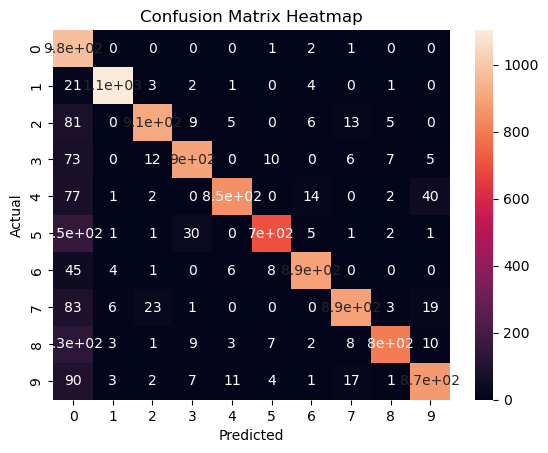

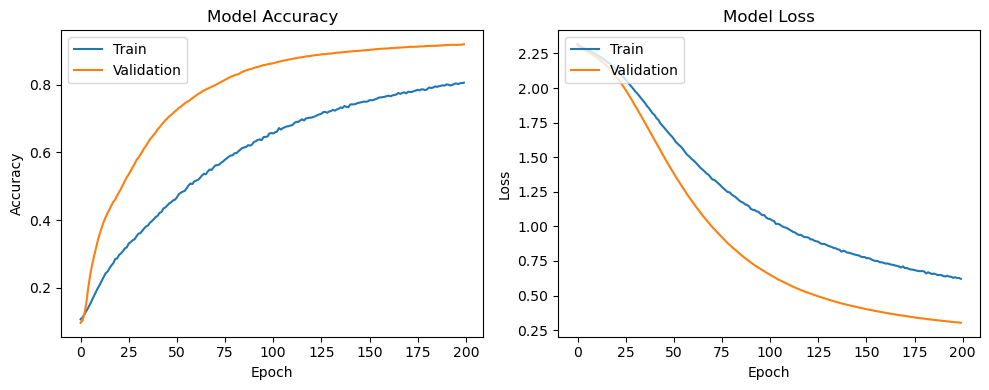

In [34]:
'''
Key metrics for Classification report:

    Precision: The ratio of correctly predicted positive observations to the total predicted positives. 
    It indicates how accurate the positive predictions are.
  
    Recall: The ratio of correctly predicted positive observations to all observations in the actual class. 
    It indicates how well the model can identify positive observations.
  
    F1-score: The weighted average of precision and recall. It gives a balance between precision and recall.
   
    Support: The number of true instances for each label in the dataset.
'''
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns
import numpy as np

# We use reset_index so that the row numbers in y_test start from 0 and go in order — just like the model's predictions
# y_test = y_test.reset_index(drop=True)

# Print the model's accuracy
print(f"The accuracy of this model: {accuracy_score(y_test,y_pred):.2f}")

# Print the classification report
print("\nThe Classification Report matrix\n")
print(classification_report(y_test, y_pred))

# Convert y_test from one-hot encoded to single integer labels
# This assumes y_test is currently in a shape like [0 0 0 0 0 0 0 1 0 0] = 7, For [0, 0, 1, 0], argmax along axis=1 gives 2.
y_test_labels = np.argmax(y_test, axis=1)

# Convert y_pred (probabilities) to single integer class labels
# This assumes y_pred is currently in a shape like [0 0 0 0 0 0 0 1 0 0] = 7, For [0, 0, 1, 0], argmax along axis=1 gives 2.
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Print the confusion matrix
print("\nThe Confusion matrix\n")
print(cm)

# Heatmap for the confusion matrix
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')    
plt.title('Confusion Matrix Heatmap')
plt.show()

# Performance of model on training data
plt.figure(figsize=(10, 4))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()